In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
bl=pd.read_csv("black_friday.csv")
bl.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
bl.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
bl['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

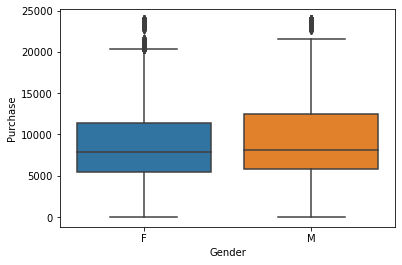

In [6]:
sns.boxplot(x='Gender',y='Purchase',data=bl)

In [7]:
bl.drop(['User_ID'],axis=1,inplace=True)

In [8]:
bl.drop(['Product_ID'],axis=1,inplace=True)

In [9]:
bl['Gender']=pd.get_dummies(bl["Gender"],drop_first=1)
bl

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,0,55+,1,C,2,0,20,NaN,NaN,365


In [10]:
bl['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
bl['Age'] = bl['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [12]:
bl.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,NaN,NaN,1422
3,0,1,10,A,2,0,12,14.0,NaN,1057
4,1,7,16,C,4+,0,8,NaN,NaN,7969


In [13]:
bl.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
bl["Product_Category_2"] = bl["Product_Category_2"].fillna(bl["Product_Category_2"].mode()[0])
bl["Product_Category_2"].isnull().sum()


0

In [15]:
bl["Product_Category_3"] = bl["Product_Category_3"].fillna(bl["Product_Category_3"].mode()[0])
bl["Product_Category_3"].isnull().sum()

0

In [16]:
bl["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
bl['Stay_In_Current_City_Years']=bl['Stay_In_Current_City_Years'].str.replace("+","")

<ipython-input-17-eaba8a2804c1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bl['Stay_In_Current_City_Years']=bl['Stay_In_Current_City_Years'].str.replace("+","")


In [18]:
bl["Stay_In_Current_City_Years"] = bl["Stay_In_Current_City_Years"].astype(int)

In [19]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  uint8  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(1), uint8(1)
memory usage: 36.2+ MB


In [20]:
bl['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
city=pd.get_dummies(bl['City_Category'],drop_first=True)

In [22]:
bl=pd.concat([bl,city],axis=1)

In [23]:
bl.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,C,4,0,8,8.0,16.0,7969,0,1


In [25]:
bl['B']=bl['B'].astype(int)
bl['C']=bl['C'].astype(int)

In [29]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  uint8  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(3), int64(5), object(1), uint8(1)
memory usage: 40.

In [30]:
bl.drop("City_Category", axis = 1, inplace = True)

In [31]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  uint8  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int32  
 10  C                           550068 non-null  int32  
dtypes: float64(2), int32(3), int64(5), uint8(1)
memory usage: 36.2 MB
